### How RandomForestClassifier Works with Base Learners:  

### Bootstrap Sampling:  
In a random forest, each base learner (decision tree) is trained on a random subset of the data drawn with replacement (bootstrap sampling). This subset is not evenly divided but is randomly sampled. Typically, the subset is the same size as the original dataset, but some samples may appear multiple times due to replacement.  

For example, if you have 1000 samples, each of the 5 decision trees might train on 1000 samples with replacement (not evenly divided into 200 each).  

### Feature Subsampling:  
During training, random forests also randomly select a subset of features at each split. This adds more randomness to improve generalization.  

### To predict if the new product launched by the company will be accepted by customers or not

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(r'C:\Users\Nitin Flavier\Desktop\Data Nexus\Data Science\ML_BootCamp\ML_Algos\Random_Forest\Dataset\Cleaned_Data_Travel.csv')

df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,Visitors
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [3]:
X = df.drop(['ProdTaken'],axis=1)
y = df['ProdTaken']

In [4]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=32)


In [7]:
# Using Column Transformer to Tranform all features under one go
cat_feature = X.select_dtypes(include='object').columns
num_feature = X.select_dtypes(exclude='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler 
from sklearn.compose import ColumnTransformer 

# Usually we dont need StandardScaler for DT (random forest or Boosting ensemble techniques)
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

pre_processor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_feature),
        ("StandardScaler",numeric_transformer,num_feature)
    ]
)

In [8]:
X_train = pre_processor.fit_transform(X_train)

In [9]:
X_test = pre_processor.transform(X_test)

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score, precision_score, recall_score

models = {
    "Logistic_Regression": LogisticRegression(),
    "Decision_Tree": DecisionTreeClassifier(),
    "Random_Forest": RandomForestClassifier()
}

In [17]:
n = len(models)

for key,value in models.items():
    model = value 
    model.fit(X_train,y_train)

    # make predictions 
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Trained Data performance 
    model_train_acc = accuracy_score(y_train,y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred)
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall = recall_score(y_train,y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train,y_train_pred)

    # Test Data performance 
    model_test_acc = accuracy_score(y_test,y_test_pred)
    model_test_f1 = f1_score(y_test,y_test_pred)
    model_test_precision = precision_score(y_test,y_test_pred)
    model_test_recall = recall_score(y_test,y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test,y_test_pred)

    print(f"Model: {key}")

    print("Model Performance for Training set")
    print("- Accuracy: {:.4f}".format(model_train_acc))
    print("- F1-Score: {:.4f}".format(model_train_f1))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- Roc Auc Score: {:.4f}".format(model_train_rocauc_score))

    print()

    print("Model Performance for Test set")
    print("- Accuracy: {:.4f}".format(model_test_acc))
    print("- F1-Score: {:.4f}".format(model_test_f1))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- Roc Auc Score: {:.4f}".format(model_test_rocauc_score))

    print("-----------------------------------------------------------------------------------------------------------------")


Model: Logistic_Regression
Model Performance for Training set
- Accuracy: 0.8445
- F1-Score: 0.3830
- Precision: 0.6991
- Recall: 0.2638
- Roc Auc Score: 0.6192

Model Performance for Test set
- Accuracy: 0.8377
- F1-Score: 0.4018
- Precision: 0.7521
- Recall: 0.2741
- Roc Auc Score: 0.6259
-----------------------------------------------------------------------------------------------------------------
Model: Decision_Tree
Model Performance for Training set
- Accuracy: 1.0000
- F1-Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000

Model Performance for Test set
- Accuracy: 0.9071
- F1-Score: 0.7741
- Precision: 0.7493
- Recall: 0.8006
- Roc Auc Score: 0.8671
-----------------------------------------------------------------------------------------------------------------
Model: Random_Forest
Model Performance for Training set
- Accuracy: 1.0000
- F1-Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000

Model Performance for Test set
- Accur

For logistic regression the recall is very less.

Recall: given my actual output is '1' how many times do I actually predict it correctly here its 27 times out of 100 times which is bad.

What min_samples_split Does:  

min_samples_split controls when a decision tree node can be split within each base learner.
It applies to the number of samples in a node during the tree-building process. If a node has fewer samples than min_samples_split, it is not split further.  

For example:  

If min_samples_split=5, a node in a decision tree (base learner) will only be split if it has at least 5 samples.
This setting is independent of how the dataset is distributed among the base learners.  

The min_samples_leaf parameter in decision tree algorithms specifies the minimum number of samples that must be present in a leaf node. This prevents the algorithm from creating leaf nodes that are too small (which could lead to overfitting).  

Key Differences from min_samples_split:  
  
min_samples_split: ensures that a node must have a minimum number of samples before splitting.  
min_samples_leaf: ensures that after splitting, each leaf node must have at least the specified number of samples.

In [18]:
# Hyper-Parameter Tuning 
rf_params = {
    'max_depth': [5,8,10,15,None],
    'max_features': [5,7,8,"auto"],
    "min_samples_split": [2,8,15,20],
    "n_estimators": [100,200,500,1000]
}

# models list for hyper-parameter tuning
random_cv_models = [
    ("RF",RandomForestClassifier(),rf_params)
] 

n_iter: means it takes any n_iter from different possible combinations, this reduces the time to compute, it manages runtime vs quality of the model.

In [19]:
from sklearn.model_selection import RandomizedSearchCV 

model_param = {}

for name, model, params in random_cv_models:
    randomcv = RandomizedSearchCV(estimator=model,param_distributions=params,n_iter=100,cv=3,verbose=2) 

    randomcv.fit(X_train,y_train)
    model_param[name] = randomcv.best_params_

for model_name in model_param:
    print(f"For {model}")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_depth=5, max_features=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=15, max_features=5, min_samples_split=8, n_estimators=500; total time=   1.0s
[CV] END max_depth=15, max_features=5, min_samples_split=8, n_estimators=500; total time=   0.9s
[CV] END max_depth=15, max_features=5, min_samples_split=8, n_estimators=500; total time=   0.9s
[CV] END max_depth=10, max_features=5, min_samples_split=20, n_estimators=500; total time=   0.8s
[CV] END max_depth=10, max_features=5, min_samples_split=20, n_estimators=500; total time=   0.8s
[CV] END max_depth=10, max_features=5, min_samples_split=20, n_estimators=500; total time=   0.9s
[CV] END max_depth=5, max_features=8, min_samples_split=15, n_es

c:\Users\Nitin Flavier\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
54 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Nitin Flavier\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Nitin Flavier\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Nitin Flavier\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\N

For RandomForestClassifier()
{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}


In [22]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=model_param['RF']['n_estimators'],min_samples_split=model_param['RF']['min_samples_split'],max_features=model_param['RF']['max_features'])
}

for key,value in models.items():
    model = value 
    model.fit(X_train,y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Trained Data performance 
    model_train_acc = accuracy_score(y_train,y_pred_train)
    model_train_f1 = f1_score(y_train,y_pred_train)
    model_train_precision = precision_score(y_train,y_pred_train)
    model_train_recall = recall_score(y_train,y_pred_train)
    model_train_rocauc_score = roc_auc_score(y_train,y_pred_train)

    # Test Data performance 
    model_test_acc = accuracy_score(y_test,y_pred_test)
    model_test_f1 = f1_score(y_test,y_pred_test)
    model_test_precision = precision_score(y_test,y_pred_test)
    model_test_recall = recall_score(y_test,y_pred_test)
    model_test_rocauc_score = roc_auc_score(y_test,y_pred_test)

    print(f"Model: {key}")

    print("Model Performance for Training set")
    print("- Accuracy: {:.4f}".format(model_train_acc))
    print("- F1-Score: {:.4f}".format(model_train_f1))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- Roc Auc Score: {:.4f}".format(model_train_rocauc_score))

    print()

    print("Model Performance for Test set")
    print("- Accuracy: {:.4f}".format(model_test_acc))
    print("- F1-Score: {:.4f}".format(model_test_f1))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- Roc Auc Score: {:.4f}".format(model_test_rocauc_score))

    print("-----------------------------------------------------------------------------------------------------------------")
    

Model: Random Forest
Model Performance for Training set
- Accuracy: 1.0000
- F1-Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000

Model Performance for Test set
- Accuracy: 0.9250
- F1-Score: 0.7780
- Precision: 0.9464
- Recall: 0.6604
- Roc Auc Score: 0.8256
-----------------------------------------------------------------------------------------------------------------


### Plot ROC AOC curve -> TPR vs FPR      

TPR = TP/(TP+FN)  
FPR = FP/(FP+TN)  

TPR [True Positive Rate]: given the actual value is 1 how much is the prediction right.  
FPR [False Positive Rate]: given the given the actual value is 0 how much is the prediction wrong (i.e wrongly predicting 1)

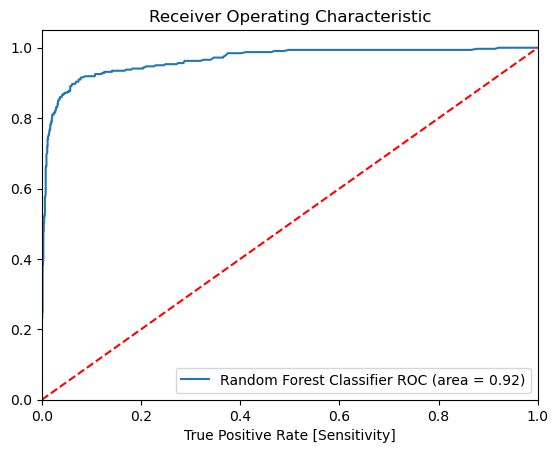

In [25]:
from sklearn.metrics import roc_auc_score, roc_curve

auc_models = [
    {
        'label': 'Random Forest Classifier',
        'model': RandomForestClassifier(n_estimators=model_param['RF']['n_estimators'],min_samples_split=model_param['RF']['min_samples_split'],max_features=model_param['RF']['max_features']),
        'auc': 0.92
    }
]

# create loop through all model 
for algo in auc_models:
    model = algo['model']
    model.fit(X_train,y_train)

    # compute false positive rate, true positive rate
    fpr, tpr, threshold = roc_curve(y_test, model.predict_proba(X_test)[:,1])

    # calculate area under curve to display on plot
    plt.plot(fpr ,tpr , label='%s ROC (area = %0.2f)' % (algo['label'],algo['auc']))

plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate [1-Specificity]')
plt.xlabel('True Positive Rate [Sensitivity]')

plt.title('Receiver Operating Characteristic')
plt.legend()

